In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as opencv
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(dirname, filename)
        print(os.path.join(dirname, filename))
        break
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-maps-restaurant-reviews reviews.csv
/kaggle/input/google-maps-restaurant-reviews/reviews.csv
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/outdoor_atmosphere my_friends_burger_fethi_duhan_calik.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/outdoor_atmosphere/my_friends_burger_fethi_duhan_calik.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/taste sardalye_efecan_kobo.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/taste/sardalye_efecan_kobo.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/menu nazar_cafe_kadir_turkoglu.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/menu/nazar_cafe_kadir_turkoglu.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/indoor_atmosphere cemo_etliekmek_mehmet_akyel.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/indoor_atmosphere/cemo_etliekmek_mehmet_akyel.png
/kaggle/input/google-maps-restaurant-reviews/sep

## Reading in the dataset

In [2]:
complete_dataset = pd.read_csv('/kaggle/input/google-maps-restaurant-reviews/reviews.csv')
complete_dataset

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu
...,...,...,...,...,...,...
1095,Miss Pizza,Salih Gursoy,There are so many types of pizza; you are surp...,dataset/taste/miss_pizza_salih_gursoy.png,5,taste
1096,Miss Pizza,Kemal Amangeldi,I tried the smoked ribeye pizza; the dough is ...,dataset/indoor_atmosphere/miss_pizza_kemal_ama...,5,indoor_atmosphere
1097,Miss Pizza,Ulkem Esen,Crowded and expensive place.,dataset/menu/miss_pizza_ulkem_esen.png,3,menu
1098,Miss Pizza,Ilkin Saymaz,No bad. It was very crowded; there was no ligh...,dataset/taste/miss_pizza_ilkin_saymaz.png,3,taste


## Looking at the data counts and missing values

In [3]:
complete_dataset.describe() # only gives information about the rating as all other columns contain object dtypes.

,rating
count,1100.000000
mean,3.912727
std,1.218459
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


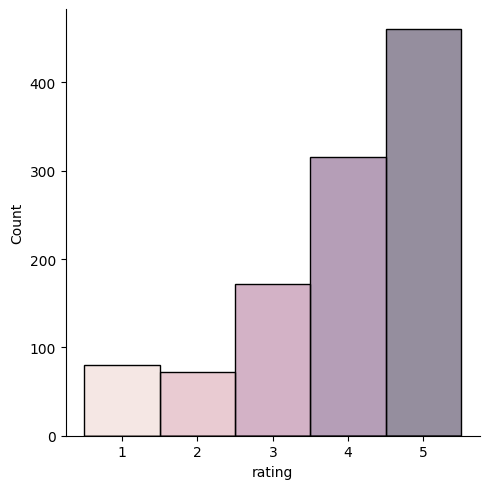

In [4]:
sns.displot(complete_dataset, x="rating", discrete=True, kde=True, hue="rating", legend=False)

In [5]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


In [6]:
complete_dataset.isna().sum() # no null values: a really good dataset?

business_name      0
author_name        0
text               0
photo              0
rating             0
rating_category    0
dtype: int64

In [7]:
print("List of Restaurants:\n", complete_dataset["business_name"].unique())
print()
print("Count = ", complete_dataset["business_name"].nunique())

List of Restaurants:
 ["Haci'nin Yeri - Yigit Lokantasi" 'Pizza Fellas' 'Cafe Inn' 'Riviera'
 'Sakip Usta Gaziantep' 'Imam Cagdas' 'Gold Semaver'
 'Fethiye Dondurmacisi' 'My Friends Burger' 'Mcdonalds Fethiye'
 'Pukka Marmaris' 'Starbucks Bodrum' 'Churchill Bistro' 'Leman Kultur'
 'Tatbak' 'Guzel Koy Cafe' 'Cemo Etliekmek' 'Korelee' 'Patso Burger'
 'Vefa Bozacisi' 'Salacak' 'Nusr-et' 'Tuana Restaurant' 'Cici Tantuni'
 'Bunbun Kas' 'Gulcimen Aspava' 'Nazar Cafe' 'Alsancak Firin' 'Sushico'
 'Sardalye' 'Kumrucu Omur' 'Kofteci Yusuf' 'Bogazkoy Restaurant' 'Nesh'
 'Flash' 'Metanet Lokantasi' 'Midpoint' 'Pecko Firin Atakum' 'Bilice'
 'Baruthane Pilavcisi' 'Medeniyetler Sofrasi' 'Backyard' 'Alavara' 'Zula'
 'Kafros Pizzeria' 'Kebabci Halil Usta' 'Abidin Tantuni' 'Ahsap Iskender'
 'Kasikla Restaurant' 'Askin Tostevi' 'Pizzeria Remo'
 'Diyarbakir Ocakbasi Palace' 'Kaliteci' 'Sanukiya' 'KFC' 'Kruvasan'
 'Midyeci Ahmet' 'Kalkanoglu Pilav' 'Monica Kitchen' 'Sevinc Pastanesi'
 'Hasan Usta' 'Magro' 

In [8]:
print("List of Authors:\n", complete_dataset["author_name"].unique())
print()
print("Count = ", complete_dataset["author_name"].nunique())

List of Authors:
 ['Gulsum Akar' 'Oguzhan Cetin' 'Yasin Kuyu' ... 'Ulkem Esen'
 'Ilkin Saymaz' 'Samet Selcuk']

Count =  1074


In [9]:
print(complete_dataset["author_name"].value_counts())
print()
multiple_rating_authors = complete_dataset["author_name"].value_counts() > 1
len(multiple_rating_authors[multiple_rating_authors == True]) # 22 authors have written multiple reviews out of all the 1074 unique authors

author_name
Nihat Karabiber     3
Ece Oztunc          3
Mustafa Ay          3
Saliha Senyildiz    3
Seda Seven          2
                   ..
Derya Al            1
Hilal Kaya          1
Resul Diri          1
Behcet Cengiz       1
Samet Selcuk        1
Name: count, Length: 1074, dtype: int64



22

### Dropping photo path for now to focus on the rest of the dataset

In [10]:
dataset = complete_dataset.drop("photo", axis=1)
dataset

,business_name,author_name,text,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,3,menu
...,...,...,...,...,...
1095,Miss Pizza,Salih Gursoy,There are so many types of pizza; you are surp...,5,taste
1096,Miss Pizza,Kemal Amangeldi,I tried the smoked ribeye pizza; the dough is ...,5,indoor_atmosphere
1097,Miss Pizza,Ulkem Esen,Crowded and expensive place.,3,menu
1098,Miss Pizza,Ilkin Saymaz,No bad. It was very crowded; there was no ligh...,3,taste


### Creating a text length column

In [11]:
dataset["text_length"] = [len(text) for text in dataset["text"]]
dataset

,business_name,author_name,text,rating,rating_category,text_length
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,5,taste,680
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,4,menu,914
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,3,outdoor_atmosphere,173
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,5,indoor_atmosphere,63
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,3,menu,161
...,...,...,...,...,...,...
1095,Miss Pizza,Salih Gursoy,There are so many types of pizza; you are surp...,5,taste,159
1096,Miss Pizza,Kemal Amangeldi,I tried the smoked ribeye pizza; the dough is ...,5,indoor_atmosphere,66
1097,Miss Pizza,Ulkem Esen,Crowded and expensive place.,3,menu,28
1098,Miss Pizza,Ilkin Saymaz,No bad. It was very crowded; there was no ligh...,3,taste,112


## Rating vs text length

<Axes: xlabel='rating', ylabel='text_length'>

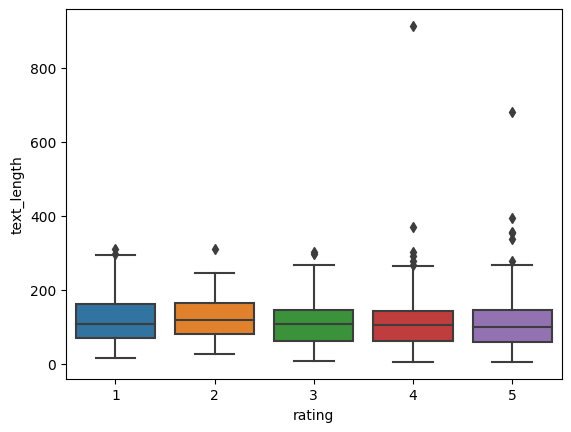

In [12]:
sns.boxplot(x=dataset["rating"], y=dataset["text_length"])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


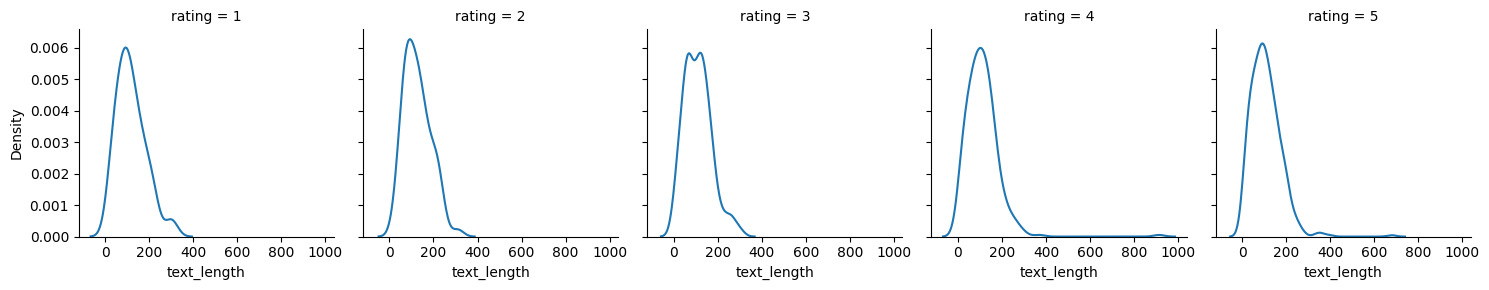

In [13]:
ratings = dataset["rating"].value_counts().index
grid = sns.FacetGrid(dataset, col="rating", row_order=ratings)
grid.map(sns.kdeplot, "text_length")

In [14]:
lengthwise_df = dataset.groupby("rating")

print("MEAN", lengthwise_df["text_length"].mean())
print()
print("MEDAIN", lengthwise_df["text_length"].median())

MEAN rating
1    117.837500
2    126.125000
3    109.052326
4    110.740506
5    107.956522
Name: text_length, dtype: float64

MEDAIN rating
1    107.0
2    117.5
3    107.0
4    104.0
5     99.0
Name: text_length, dtype: float64


#### The length of text reviews do not seem to have much of a change on what rating was given to the restaurant.

## Rating Category vs text length

<Axes: xlabel='rating_category', ylabel='text_length'>

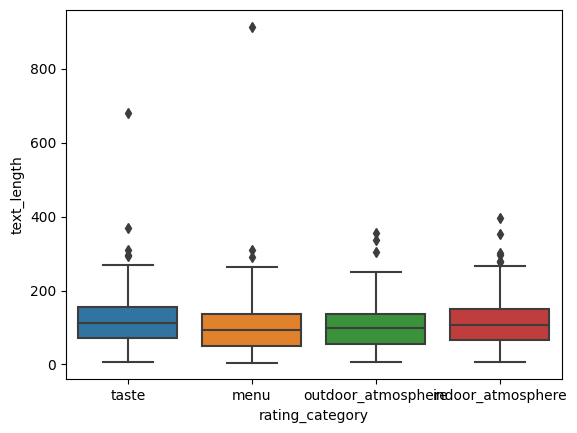

In [15]:
sns.boxplot(x=dataset["rating_category"], y=dataset["text_length"])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


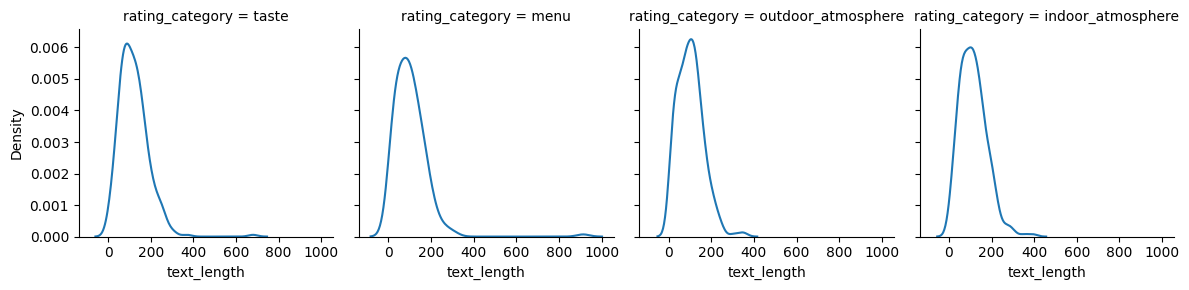

In [16]:
rating_categories = dataset["rating"].value_counts().index
grid = sns.FacetGrid(dataset, col="rating_category", row_order=rating_categories)
grid.map(sns.kdeplot, "text_length")

In [17]:
lengthwise_df2 = dataset.groupby("rating_category")

print("MEAN", lengthwise_df2["text_length"].mean())
print()
print("MEDAIN", lengthwise_df2["text_length"].median())

MEAN rating_category
indoor_atmosphere     114.149306
menu                  102.765306
outdoor_atmosphere    102.041958
taste                 120.357576
Name: text_length, dtype: float64

MEDAIN rating_category
indoor_atmosphere     107.5
menu                   92.0
outdoor_atmosphere     98.0
taste                 112.5
Name: text_length, dtype: float64


## New section